# Homework W02d04 - Testing the central limit theorem

By creating random samples from given probability distributions, we can easily test their properties without having to go into abstract mathematics.

Using the commands provided below, draw random samples of varying size from the following distributions:
1. Uniformly distributed integers (https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete_randint.html) from 1 to six simulating throwing a die. Use randint.rvs(1, high=7, size=size) to generate the samples.
1. A binomial distribution (https://docs.scipy.org/doc/scipy/reference/tutorial/stats/discrete_binom.html) giving values 0 or 1 with probability one half. Use binom.rvs(1,0.5,size=size) to generate the samples.
1. A Pareto distribution https://docs.scipy.org/doc/scipy/reference/tutorial/stats/continuous_pareto.html for the two different cases with exponent alpha=2.5 and alpha=1.5. Use pareto.rvs(alpha,size=size) to generate the samples.

With the given command, create for each of these distributions 10000 samples setting the sample size to the variable 'size' varying from very small (e.g. 1) to very large (e.g. 1000). For each chosen size, plot the distribution of the means of the 10000 samples. Describe what you observe. Do all the distributions behave in the same way? For the Pareto distribution, try logarithmic plotting.

In [27]:
# You will need these libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import randint, binom, pareto
%matplotlib inline

# Additional imports
import pandas as pd
import matplotlib
matplotlib.style.use('ggplot')
from scipy.stats import kurtosis

# Define global variables
nb_sim = 10000
sizes = [10**i for i in range(4)]

# Define plotting function
def display(list,b=10):
    plt.hist(list,bins=b)
    plt.axvline(np.mean(list),color="r")
    plt.axvline(np.median(list),color="b")
    plt.show()

Sample size 1,mean 3.483600, standard error 1.708312


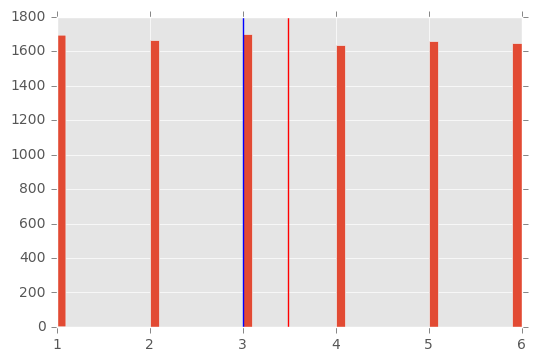

Sample size 10,mean 3.491940, standard error 0.537707


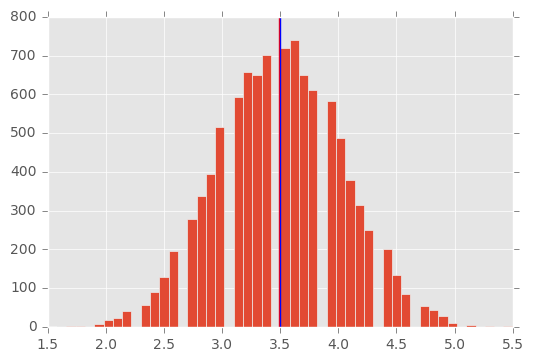

Sample size 100,mean 3.499861, standard error 0.172058


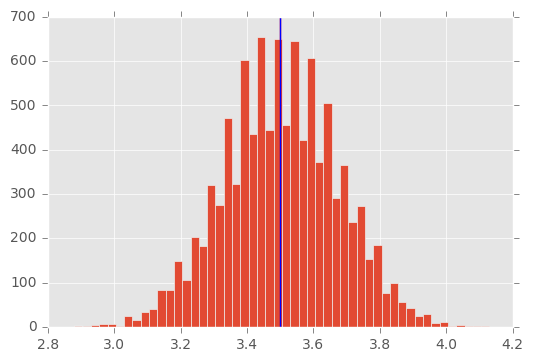

Sample size 1000,mean 3.499911, standard error 0.053508


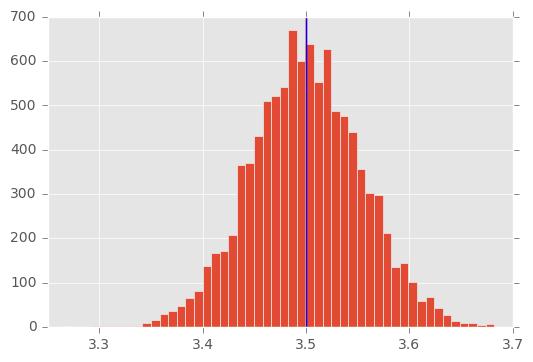

In [37]:
# Uniform distribution
for i in sizes:
    res = []
    for n in range(nb_sim):
        res.append(np.mean([randint.rvs(1, high=7, size=i)]))
    print("Sample size %d,mean %f, standard error %f" % (i,np.mean(res),np.std(res)))
    display(res,b=50)

Sample size 1,mean 0.505100, standard error 0.499974


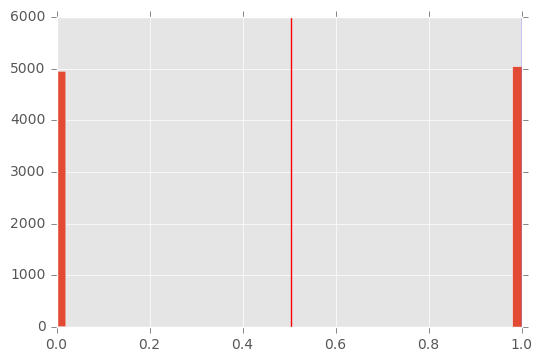

Sample size 10,mean 0.500810, standard error 0.161091


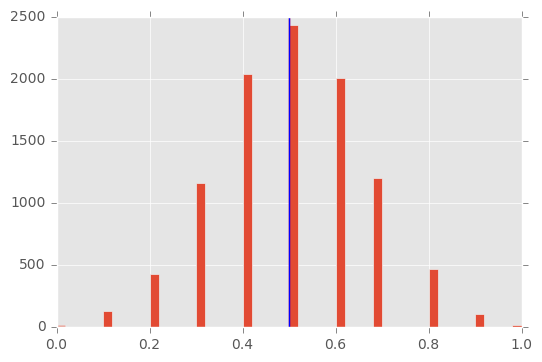

Sample size 100,mean 0.499734, standard error 0.049505


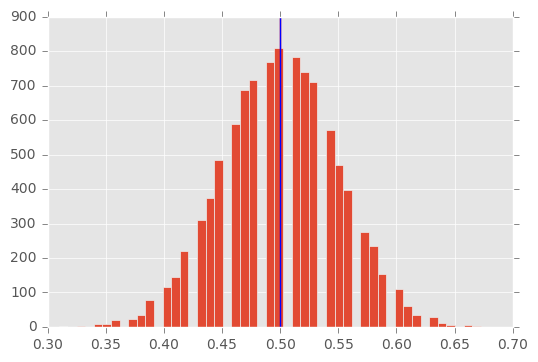

Sample size 1000,mean 0.499897, standard error 0.015843


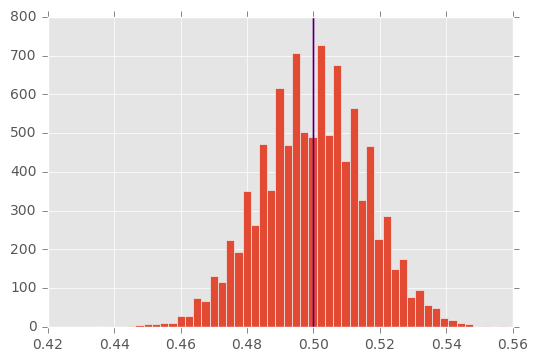

In [38]:
# Binomial distribution
for i in sizes:
    res = []
    for n in range(nb_sim):
        res.append(np.mean([binom.rvs(1,0.5,size=i)]))
    print("Sample size %d,mean %f, standard error %f" % (i,np.mean(res),np.std(res)))
    display(res,b=50)

Sample size 1,mean 1.673791, standard error 1.254184


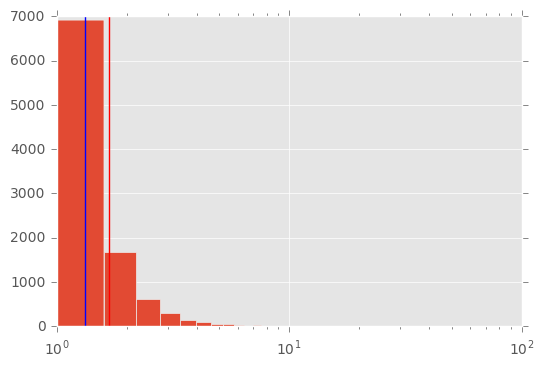

Sample size 10,mean 1.671347, standard error 0.475185


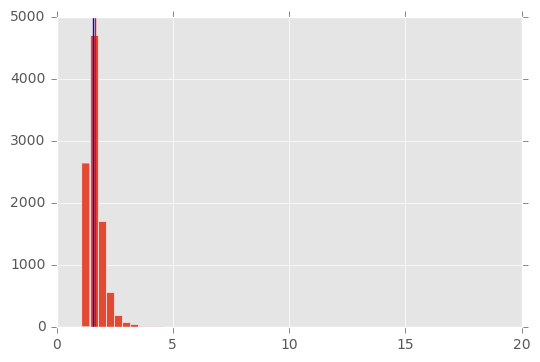

Sample size 100,mean 1.665595, standard error 0.140982


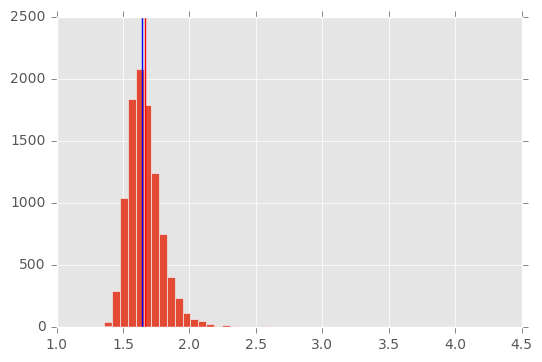

Sample size 1000,mean 1.666355, standard error 0.044685


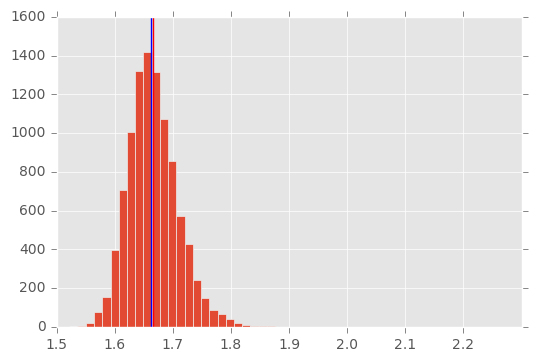

In [45]:
# Pareto distribution with alpha = 2.5
plt.xscale('log')
alpha = 2.5
for i in sizes:
    res = []
    for n in range(nb_sim):
        res.append(np.mean([pareto.rvs(alpha,size=i)]))
    print("Sample size %d,mean %f, standard error %f" % (i,np.mean(res),np.std(res)))
    display(res,b=50)

Sample size 1,mean 2.927847, standard error 8.627337


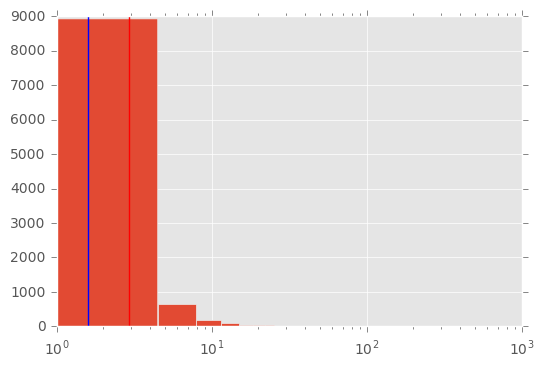

Sample size 10,mean 2.951003, standard error 3.895984


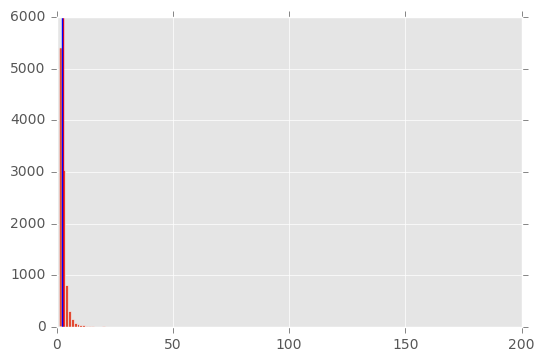

Sample size 100,mean 2.997040, standard error 4.300708


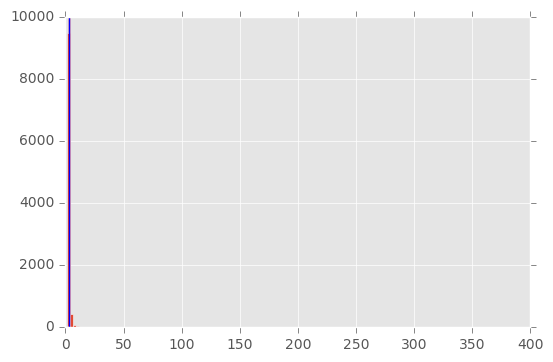

Sample size 1000,mean 2.982447, standard error 1.129626


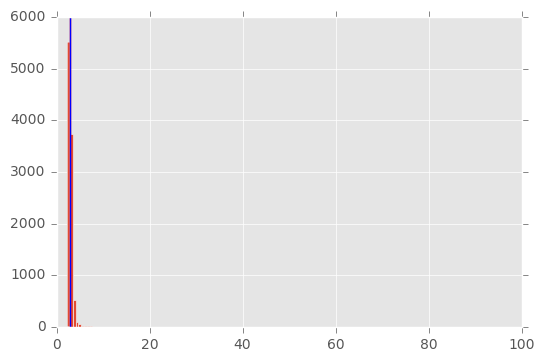

In [48]:
# Pareto distribution with alpha = 1.5
plt.xscale('log')
alpha = 1.5
for i in sizes:
    res = []
    for n in range(nb_sim):
        res.append(np.mean([pareto.rvs(alpha,size=i)]))
    print("Sample size %d,mean %f, standard error %f" % (i,np.mean(res),np.std(res)))
    display(res,b=150)

### Conclusion
We observe the same behaviour for all the simulations, the bigger the samples, the lower the standard error when estimating the mean. Which mean the mean of the simulatzed means gets closer to the actual mean of the distribution.
This is in line with the central limit theorem.